In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sys

In [2]:
segmentations_ext = np.memmap('/data/segmentations_noexptime_bayesian_4y_1d_map.dat', dtype=np.int8, shape=(1449, 1024, 1024))
segmentations_core = np.memmap('/data/segmentations_noexptime_bayesian_4y_1d_core_map.dat', dtype=np.int8, shape=(1449, 1024, 1024))

In [3]:
def calculate_filling_factors(segmentations):
    filling_factors = np.zeros((segmentations.shape[0], 3))
    for i in range(filling_factors.shape[0]):
        total = np.sum(segmentations[i] >= 0).astype(np.float64)
        for class_i in range(3):
            filling_factors[i,class_i] = np.sum(segmentations[i] == class_i)/total
        sys.stdout.write('\r{}/{} done'.format(i+1, filling_factors.shape[0]))
        sys.stdout.flush()
    sys.stdout.write('\n')
    return filling_factors

filling_factors_ext = calculate_filling_factors(segmentations_ext)
filling_factors_core = calculate_filling_factors(segmentations_core)

1449/1449 done
1449/1449 done


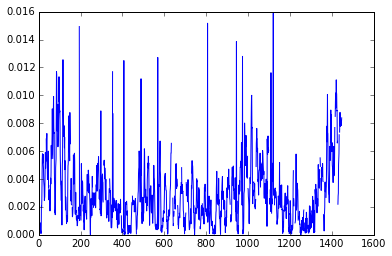

In [28]:
plt.plot(np.abs(np.ma.masked_greater(filling_factors_ext[...,2], 0.2)-np.ma.masked_greater(filling_factors_core[...,2], 0.2)))
plt.show()

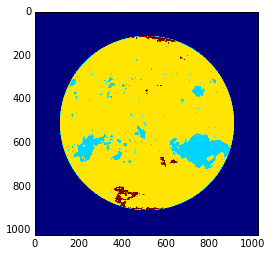

In [9]:
plt.imshow(segmentations_ext[0])

In [26]:
np.ma.masked_greater?